In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"D:\amey\datasets\amazon_reviews_us_Apparel_v1_00.tsv", index_col=None, header=0, sep="\t", error_bad_lines=False, warn_bad_lines=False)

In [6]:
df.isnull().sum()

marketplace            0
customer_id            0
review_id              0
product_id             0
product_parent         0
product_title         12
product_category       0
star_rating            1
helpful_votes          1
total_votes            1
vine                   1
verified_purchase      1
review_headline       56
review_body          785
review_date          109
dtype: int64

In [7]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
dtype: int64

In [12]:
df.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date'],
      dtype='object')

In [13]:
df['star_rating'].describe()

count    5.880916e+06
mean     4.105231e+00
std      1.259236e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: star_rating, dtype: float64

In [14]:
df['review_date'].describe()

count        5880916
unique          4747
top       2014-12-29
freq           18803
Name: review_date, dtype: object

In [15]:
df['review_date'].head()

0    2013-01-14
1    2014-03-04
2    2015-07-12
3    2015-06-03
4    2015-06-12
Name: review_date, dtype: object

In [16]:
df['time_series'] = pd.to_datetime(df['review_date'])

In [18]:
df['time_series'].head()

0   2013-01-14
1   2014-03-04
2   2015-07-12
3   2015-06-03
4   2015-06-12
Name: time_series, dtype: datetime64[ns]

In [19]:
sorted_df = df.sort_values(by=['time_series'], ascending=True)   

In [20]:
sorted_df.head()

marketplace  customer_id       review_id  product_id  product_parent  \
5880688          US     51766529  R3N7R61675XZYW  B00004U1LF       131783548   
5881155          US     51295376  R3OLOYPIUCMV3P  B00001O36O       955144407   
5880417          US     47651641   RIPDUN6PASB0H  B000050B0Q       263589486   
5881109          US     47925868  R3QEYK7M2SJ5PA  B00001O375       787653820   
5881116          US     50938262   RXARNBHUR5B5M  B00001O36V       537311477   

                                             product_title product_category  \
5880688  Disguise The Simpsons Homer Adult Vinyl Oversi...          Apparel   
5881155  Disguise Men's But Mommy I Don'T Want To Grow ...          Apparel   
5880417                               Pirate Accessory Kit          Apparel   
5881109  Disguise Men's Austin Powers Dr. Evil Deluxe C...          Apparel   
5881116        Disguise Men's Austin Powers Deluxe Costume          Apparel   

         star_rating  helpful_votes  total_votes vine verified_purchase  \
5880688          5.0            2.0          5.0    N                 N   
5881155          5.0            9.0         12.0    N                 N   
5880417          5.0            0.0          1.0    N                 N   
5881109          2.0           15.0         17.0    N                 N   
5881116          5.0            8.0         10.0    N                 N   

                                review_headline  \
5880688                                    Do'h   
5881155                          Great Costume!   
5880417  GIVE YOUR PIRATE THE JUMP ON HALLOWEEN   
5881109                             Not so evil   
5881116                     Shaggadelic costume   

                                               review_body review_date  \
5880688  This is great!  Be Homer for Haloween!  It's p...  2000-09-06   
5881155  This is one of the best costumes I've ever see...  2000-10-06   
5880417  These great accessories are just what you need...  2000-10-08   
5881109  I must admit that this costume very quickly ca...  2000-10-10   
5881116  I just got this costume and tried it on for my...  2000-10-19   

        time_series  
5880688  2000-09-06  
5881155  2000-10-06  
5880417  2000-10-08  
5881109  2000-10-10  
5881116  2000-10-19

In [29]:
len(sorted_df['time_series'].unique())

4747

In [31]:
len(sorted_df['customer_id'].unique())

3218532

In [48]:
sorted_df['customer_id'].value_counts()

50612720    559
33883540    351
33924372    344
37474421    281
15006109    262
           ... 
26694846      1
13958347      1
26526924      1
47463635      1
15743480      1
Name: customer_id, Length: 3218532, dtype: int64

In [49]:
x = []
y = []
for group,frame in sorted_df.groupby('time_series'):
    x.append(group)
    y.append(frame['star_rating'].mean())

In [57]:
senti_df = pd.DataFrame({'Time':x,'Rating':y})

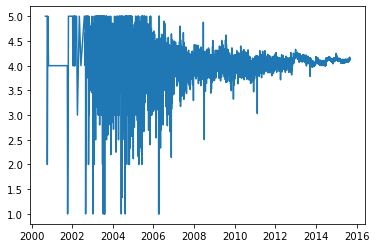

In [66]:
plt.plot(senti_df['Time'],senti_df['Rating'])

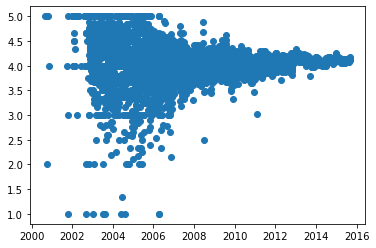

In [64]:
plt.scatter(senti_df['Time'],senti_df['Rating'])

<BarContainer object of 4747 artists>

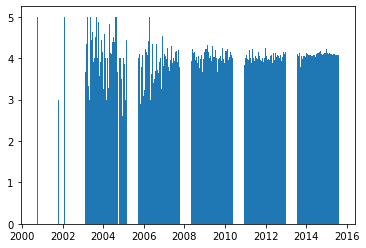

In [67]:
plt.bar(senti_df['Time'],senti_df['Rating'])

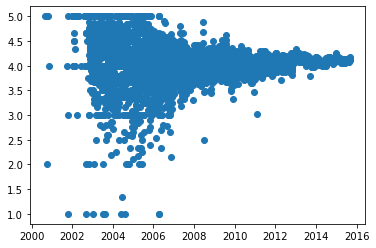

In [68]:
plt.plot_date(senti_df['Time'],senti_df['Rating'])

In [69]:
import seaborn as sns

<AxesSubplot:xlabel='Time', ylabel='Rating'>

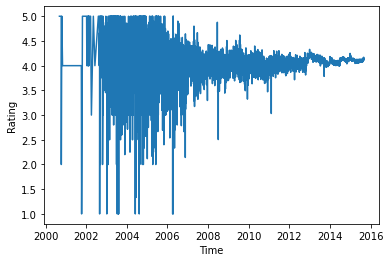

In [71]:
sns.lineplot(x=senti_df['Time'], y=senti_df['Rating'])

In [75]:
monthly_senti_df = senti_df.copy()

In [76]:
monthly_senti_df['Time'] = monthly_senti_df['Time'].apply(lambda x: x.strftime("%Y-%m"))

In [78]:
x = []
y = []
for group,frame in monthly_senti_df.groupby('Time'):
    x.append(group)
    y.append(frame['Rating'].mean())

In [79]:
new_monthly_senti_df = pd.DataFrame({"Time":x,"Rating":y})

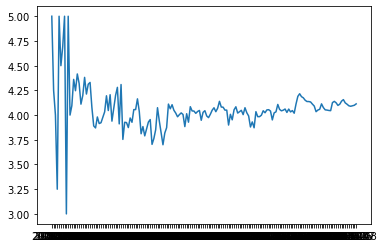

In [82]:
plt.plot(new_monthly_senti_df['Time'],new_monthly_senti_df['Rating'])

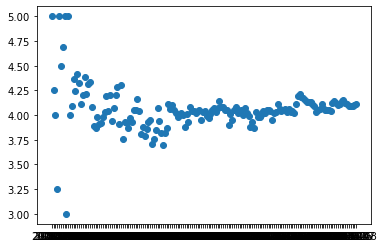

In [83]:
plt.scatter(new_monthly_senti_df['Time'],new_monthly_senti_df['Rating'])

<BarContainer object of 168 artists>

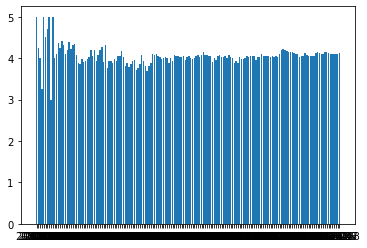

In [84]:
plt.bar(new_monthly_senti_df['Time'],new_monthly_senti_df['Rating'])

In [85]:
yearly_senti_df = senti_df.copy()

In [86]:
yearly_senti_df['Time'] = yearly_senti_df['Time'].apply(lambda x: x.strftime("%Y"))

In [87]:
x = []
y = []
for group,frame in yearly_senti_df.groupby('Time'):
    x.append(group)
    y.append(frame['Rating'].mean())

In [88]:
new_yearly_senti_df = pd.DataFrame({'Time':x,'Rating':y})

In [90]:
new_yearly_senti_df

Time    Rating
0   2000  4.333333
1   2001  3.600000
2   2002  4.379010
3   2003  4.098452
4   2004  4.076205
5   2005  3.951447
6   2006  3.857241
7   2007  4.015359
8   2008  4.021745
9   2009  4.040166
10  2010  4.000749
11  2011  4.018815
12  2012  4.067089
13  2013  4.123074
14  2014  4.093896
15  2015  4.109941

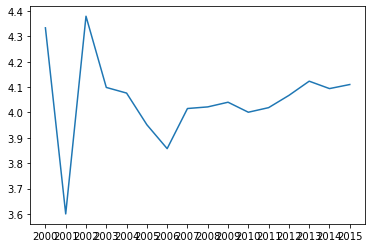

In [91]:
plt.plot(new_yearly_senti_df['Time'],new_yearly_senti_df['Rating'])

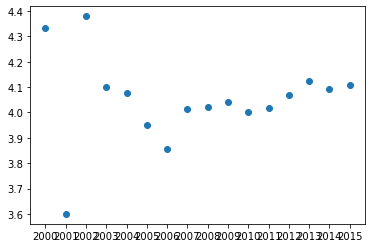

In [92]:
plt.scatter(new_yearly_senti_df['Time'],new_yearly_senti_df['Rating'])

<BarContainer object of 16 artists>

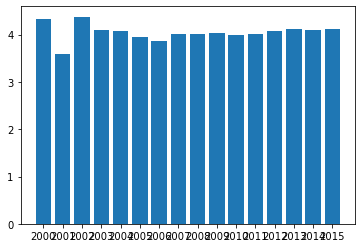

In [93]:
plt.bar(new_yearly_senti_df['Time'],new_yearly_senti_df['Rating'])

In [100]:
senti_df.to_csv("apparells-ratings.csv",index=False)

In [101]:
apparells = pd.read_csv(r"C:\users\akavade\Desktop\apparells-ratings.csv")

In [102]:
apparells

Time    Rating
0     2000-09-06  5.000000
1     2000-10-06  5.000000
2     2000-10-08  5.000000
3     2000-10-10  2.000000
4     2000-10-19  5.000000
...          ...       ...
4742  2015-08-27  4.104648
4743  2015-08-28  4.109572
4744  2015-08-29  4.170786
4745  2015-08-30  4.129041
4746  2015-08-31  4.140511

[4747 rows x 2 columns]

In [104]:
import torch

In [105]:
torch.cuda.is_available()

True